In [1]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END


# reducers
from typing import Annotated
from langgraph.graph.message import add_messages


class State(TypedDict):
    message:Annotated[list,add_messages]

In [2]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ['OPENAI_API_KEY']=os.getenv('OPENAI_API_KEY')
os.environ['GROQ_API_KEY']=os.getenv('GROQ_API_KEY')

In [26]:
from langchain_openai import ChatOpenAI
llm=ChatOpenAI(model="gpt-4o")
llm.invoke("hello")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_07871e2ad8', 'id': 'chatcmpl-C1eZTIuFkhZSPtPEfSyFyRp7nRSe4', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--f75b8dba-b3dc-43ab-8421-2d68ddde7aa6-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

AIMessage(content="Hi Bilal! That's great! Cricket is a fantastic sport. \n\nTo help me give you the best advice, tell me:\n\n* **Have you ever played cricket before?** \n* **Do you have any friends who play?**\n* **Are you interested in playing in a team or just for fun?**\n* **Do you have access to equipment like bats, balls, and wickets?**\n\nOnce I know a little more about you and your situation, I can give you some tips on how to get started playing cricket!  🏏 \n\n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 122, 'prompt_tokens': 21, 'total_tokens': 143, 'completion_time': 0.221818182, 'prompt_time': 0.00132526, 'queue_time': 0.242886053, 'total_time': 0.223143442}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--85eaed7e-59ac-477d-9cb5-58af331b140b-0', usage_metadata={'input_tokens': 21, 'output_tokens': 122, 'total_tokens': 143})

In [31]:
def superBot(state: State):
    response = llm.invoke(state["messages"][-1])  # get latest message
    return {"messages": [response]}


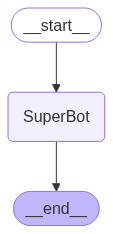

In [32]:


graph = StateGraph(State)
graph.add_node("SuperBot", superBot)
graph.add_edge(START, "SuperBot")
graph.add_edge("SuperBot", END)

# 5. Compile the Graph
graph_builder = graph.compile()

# 6. Visualize
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))


In [34]:
graph_builder.invoke({'messages':"hi i am bilal and i want to play cricket"})


ValueError: Invalid input type <class 'langchain_core.messages.human.HumanMessage'>. Must be a PromptValue, str, or list of BaseMessages.